In [82]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('darkgrid')
# preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
#MinMaxScaler range 0 to 1,StandardScaler colser to mean 0 and variance 1 range -1 to 1
from sklearn.model_selection import train_test_split
#testing
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')



In [83]:
data = pd.read_csv('heart.csv')

In [84]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# EDA

<AxesSubplot:>

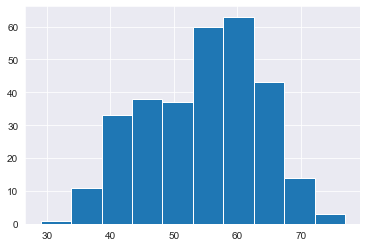

In [86]:
data['age'].hist()

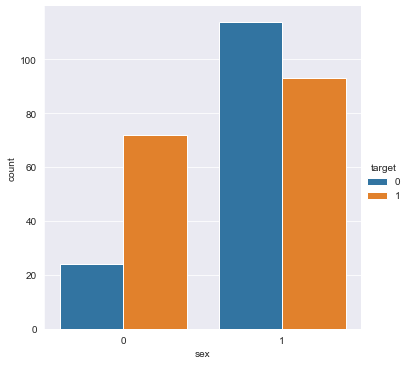

In [87]:
sns.factorplot('sex',data=data,hue='target',kind='count')
# Sex -> male=1,female =0 target-> 1=Heart Disease,0= No Heart Disease
#In comparision of females males have higher chance of having heart disease allmost 85-90
# females have allmost 70

In [88]:
#Outliers Detection
numeric_feature=['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']
eda_df=data.loc[:,numeric_feature].copy()

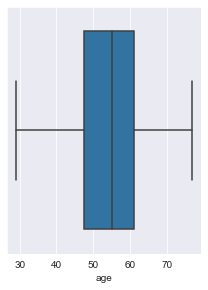

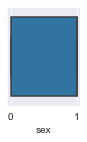

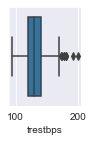

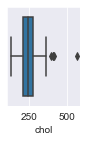

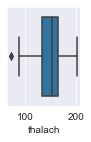

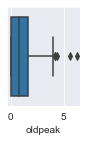

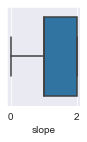

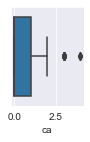

In [89]:
plt.figure(figsize=(16,10))
for i in range (len(eda_df.columns)):
    plt.subplot(2,4, i+1)#subplot indexing start from 1 and 2,4 are size of grid
    sns.boxplot(eda_df[eda_df.columns[i]])
    plt.show()

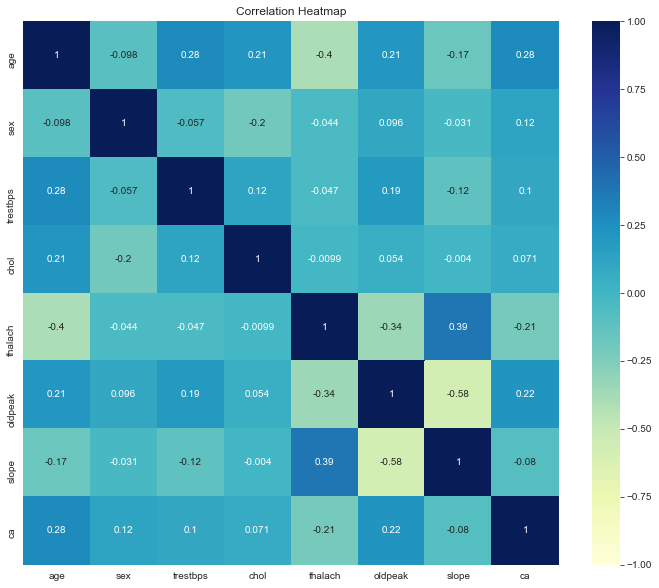

In [90]:

corr_df=eda_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_df,annot=True,vmin=-1.0,cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

### we can also visualize the class distribution with pie chart

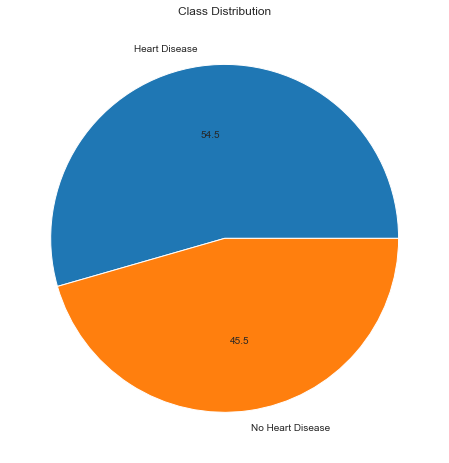

In [91]:
plt.figure(figsize=(8,8))
plt.pie(data['target'].value_counts(),labels=["Heart Disease","No Heart Disease"],autopct='%.1f')

#  colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

# preprocessing

In [92]:
# {column: len(x[column].unique())
#  for column in x.columns}

In [93]:
def onehot_encode(df,column_dict):
    df=df.copy()
    for column,prefix in column_dict.items():
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df    
        
    

In [94]:
nominal_feature=['thal','cp','slope']
dict(zip(nominal_feature,['TH','CP','SL']))

{'thal': 'TH', 'cp': 'CP', 'slope': 'SL'}

In [95]:
def preprocessing_inputs(df,scaler):
    df=df.copy()
    #one hot encode
    df= onehot_encode(df,dict(zip(nominal_feature,['TH','CP','SL'])))
    
    y=df['target'].copy()
    x=df.drop('target',axis=1).copy()
    
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)#transform return in array so we use pd.dataframe
    return x,y

In [96]:
x,y=preprocessing_inputs(data, StandardScaler())

In [97]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,TH_1,TH_2,TH_3,CP_0,CP_1,CP_2,CP_3,SL_0,SL_1,SL_2
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-0.714429,...,3.979112,-1.100763,-0.793116,-0.945384,-0.444554,-0.634648,3.489114,3.664502,-0.926766,-0.939142
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-0.714429,...,-0.251312,0.908461,-0.793116,-0.945384,-0.444554,1.575677,-0.286606,3.664502,-0.926766,-0.939142
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,-0.714429,...,-0.251312,0.908461,-0.793116,-0.945384,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,-0.714429,...,-0.251312,0.908461,-0.793116,-0.945384,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,-0.714429,...,-0.251312,0.908461,-0.793116,1.057772,-0.444554,-0.634648,-0.286606,-0.272888,-0.926766,1.064802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,0.478391,-0.101730,-0.417635,0.898962,-1.165281,1.435481,-0.724323,-0.714429,...,-0.251312,-1.100763,1.260850,1.057772,-0.444554,-0.634648,-0.286606,-0.272888,1.079021,-0.939142
299,-1.033002,0.681005,-1.234996,0.342756,-0.417635,0.898962,-0.771706,-0.696631,0.138373,-0.714429,...,-0.251312,-1.100763,1.260850,-0.945384,-0.444554,-0.634648,3.489114,-0.272888,1.079021,-0.939142
300,1.503641,0.681005,0.706843,-1.029353,2.394438,0.898962,-0.378132,-0.696631,2.036303,1.244593,...,-0.251312,-1.100763,1.260850,1.057772,-0.444554,-0.634648,-0.286606,-0.272888,1.079021,-0.939142
301,0.290464,0.681005,-0.092738,-2.227533,-0.417635,0.898962,-1.515125,1.435481,0.138373,0.265082,...,-0.251312,-1.100763,1.260850,1.057772,-0.444554,-0.634648,-0.286606,-0.272888,1.079021,-0.939142


# Training

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [99]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)
print("LogisticRegression: {:.2f}".format(lr_model.score(x_test,y_test)*100))

LogisticRegression: 85.25


In [100]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
print("Support Vector Machine : {:.2f}".format(svm_model.score(x_test,y_test)*100))

Support Vector Machine : 86.89


In [101]:
nn_model = MLPClassifier()
nn_model.fit(x_train, y_train)

print("Neural Network Accuracy: {:.2f}%".format(nn_model.score(x_test, y_test) * 100))

Neural Network Accuracy: 90.16%


In [102]:
xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)
print("XGBoost Accuracy:{:.2f}".format(xg.score(x_test,y_test)*100))

[23:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost Accuracy:83.61


In [103]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
print("Random Forest Accuracy: {:.2f}%".format(RFC.score(x_test,y_test)*100))

Random Forest Accuracy: 85.25%


In [104]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
print("Decision Tree:{:.2f}".format(xg.score(x_test,y_test)*100))

Decision Tree:83.61


### Neural Network gives you the best prediction value 